In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
%matplotlib inline

df = pd.read_csv('train.csv').drop(columns=['Id'])

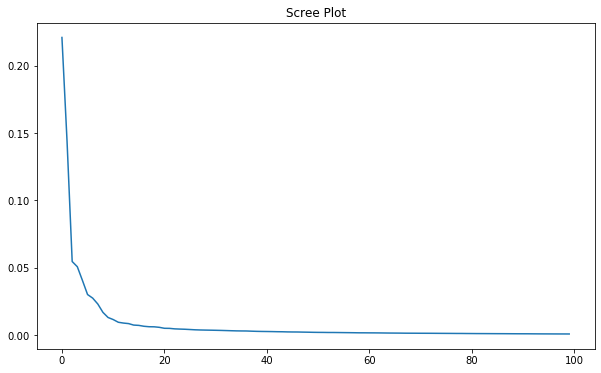

In [2]:
plt.figure(figsize=(10,6)) 
plt.plot(PCA(n_components = 100).fit(StandardScaler().fit_transform(df.iloc[:,1:])).explained_variance_ratio_)
plt.title("Scree Plot")
# plt.savefig("ScreePlot.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('MultiNomialNB Mean Accuracy: ' + str(clf.score(X_test, y_test)))

X_train_pca, X_test_pca, y_train, y_test = train_test_split(PCA(n_components = 20).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:].values)), df.iloc[:,0], test_size=0.2, random_state=42)
cs = {'Random Forest': RandomForestClassifier(n_jobs = -1, random_state=42),
      'KNN': KNeighborsClassifier(n_jobs = -1),
      'SVM': SVC(random_state=42),
      'LogisticRegression': LogisticRegression(max_iter = 1000),
      'LDA': LinearDiscriminantAnalysis(),
      'AdaBoost': AdaBoostClassifier(random_state=42),
      'GradientBoost': GradientBoostingClassifier(random_state=42)}
for name, clf in cs.items():
    clf.fit(X_train_pca, y_train)
    print(name + ' Mean Accuracy: ' + str(clf.score(X_test_pca, y_test)))

MultiNomialNB Mean Accuracy: 0.48183333333333334
Random Forest Mean Accuracy: 0.8773333333333333
KNN Mean Accuracy: 0.8596666666666667
SVM Mean Accuracy: 0.8654166666666666
LogisticRegression Mean Accuracy: 0.6613333333333333
LDA Mean Accuracy: 0.6260833333333333
AdaBoost Mean Accuracy: 0.6074166666666667
GradientBoost Mean Accuracy: 0.8334166666666667


In [2]:
X = PCA(n_components = 20).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:]))

In [5]:
modelRFC = GridSearchCV(RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'log2', 0.25, 0.5, 0.75, 1.0], 'min_samples_split': [2, 4, 6],}, n_jobs = -1).fit(X, df.iloc[:,0])
pprint(modelRFC.cv_results_)
pprint(modelRFC.best_params_)

{'mean_fit_time': array([ 30.80361257,  61.51933827, 155.02166867,  29.65585356,
        59.34626069, 149.49067369,  29.36602364,  61.28197393,
       150.99883213,  29.49530783,  60.04167266, 149.85035133,
        32.05270882,  64.38866286, 150.09851289,  29.51664495,
        59.61200056, 148.94830298,  37.17029552,  76.15200634,
       185.02366986,  36.95674191,  73.88047819, 181.2576508 ,
        36.19039922,  78.89763193, 189.66395354,  75.29235015,
       147.33856134, 370.92595263,  73.52599807, 146.32965527,
       365.77149086,  70.31755114, 141.8323801 , 358.36573434,
       105.16038136, 217.04371052, 532.59989266, 103.16258917,
       215.09476705, 538.87324028, 103.86021924, 214.80654469,
       535.72371149, 145.1697401 , 291.58643265, 714.40859547,
       142.715132  , 285.06304722, 727.47653408, 143.69549069,
       291.95671778, 697.58673959]),
 'mean_score_time': array([0.39551268, 0.70040126, 1.99226303, 0.37103939, 0.73953218,
       2.02041602, 0.31938415, 0.759211

In [8]:
modelKNN = GridSearchCV(KNeighborsClassifier(), {'weights': ['uniform', 'distance'],'n_neighbors': [*range(1, 30)],'p': [1, 2],}, n_jobs = -1).fit(X, df.iloc[:,0])
pprint(modelKNN.cv_results_)
pprint(modelKNN.best_params_)

{'mean_fit_time': array([0.25850277, 0.23688784, 0.25566564, 0.26191692, 0.23372288,
       0.25918236, 0.27382021, 0.22028985, 0.22560072, 0.22504163,
       0.26962414, 0.24496503, 0.22306461, 0.27562604, 0.23513136,
       0.26539712, 0.24467134, 0.24918118, 0.23658047, 0.23375263,
       0.23152804, 0.26114831, 0.27076068, 0.25002046, 0.23869882,
       0.23144979, 0.27074957, 0.22585087, 0.24808698, 0.2348671 ,
       0.25366921, 0.2419652 , 0.28523297, 0.25574594, 0.24310489,
       0.27544737, 0.26333857, 0.27995   , 0.2376564 , 0.27335815,
       0.25078106, 0.22791438, 0.26082783, 0.24398685, 0.25386438,
       0.23207941, 0.25582156, 0.2775713 , 0.25501151, 0.25808415,
       0.25746827, 0.25596828, 0.24443693, 0.25822902, 0.25065837,
       0.25367422, 0.25271225, 0.2632226 , 0.24353313, 0.25426412,
       0.24863524, 0.25101967, 0.2417047 , 0.24809861, 0.26117773,
       0.24860549, 0.26379213, 0.2459703 , 0.2546227 , 0.26716671,
       0.23270459, 0.27472901, 0.26400008, 0

In [8]:
modelSVM = GridSearchCV(SVC(random_state=42, kernel='rbf', gamma='scale'), {'C':[10, 15, 20, 25, 30, 35]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelSVM.cv_results_)
pprint(modelSVM.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.5min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  8.2min remaining:   54.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.3min finished


{'mean_fit_time': array([81.55327678, 87.69743104, 87.32895269, 86.6975574 , 88.30346622,
       90.39406328]),
 'mean_score_time': array([11.39592252, 11.01789842, 10.85458031, 11.15145764, 10.53003569,
        9.5193603 ]),
 'mean_test_score': array([0.88043333, 0.88215   , 0.88323333, 0.8845    , 0.88505   ,
       0.88561667]),
 'param_C': masked_array(data=[10, 15, 20, 25, 30, 35],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 10}, {'C': 15}, {'C': 20}, {'C': 25}, {'C': 30}, {'C': 35}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.88033333, 0.8825    , 0.88433333, 0.8855    , 0.88566667,
       0.88641667]),
 'split1_test_score': array([0.87725   , 0.87975   , 0.881     , 0.88233333, 0.88316667,
       0.88308333]),
 'split2_test_score': array([0.88275   , 0.88416667, 0.88566667, 0.88775   , 0.88833333,
       0.88841667]),
 'split3_test_score': array([

In [5]:
def cm_plot(cm, y_test, title):
    N = list(map(lambda clazz : sum(y_test == clazz), [*range(5)]))
    plt.figure(figsize=(7,5)) 
    c = plt.pcolormesh([cm[j, :] / N[j] for j in range(5)], vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(0.5 + np.arange(5), np.arange(5))
    plt.yticks(0.5 + np.arange(5), np.arange(5))
    c.update_scalarmappable()
    ax = c.axes
    for p, color, value in zip(c.get_paths(), c.get_facecolors(), c.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        ax.text(x, y, "%.2f" % value, ha="center", va="center", color=(0.0, 0.0, 0.0) if sum(color[:2] > 0.3) >= 2 else (1.0, 1.0, 1.0))
#     plt.savefig(title+'.png', bbox_inches='tight', dpi=300)
    return plt.show()

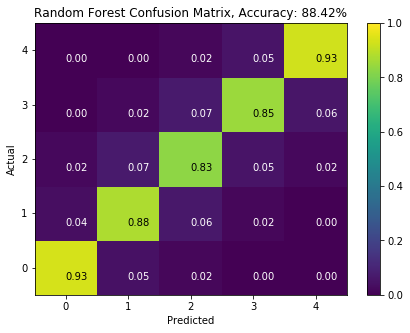

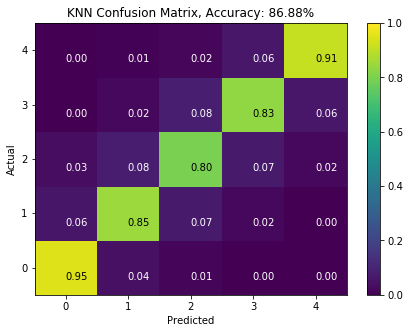

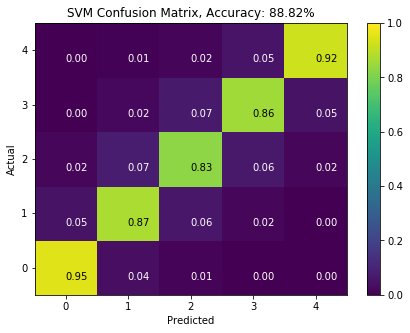

In [6]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(PCA(n_components = 20).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:].values)), df.iloc[:,0], test_size=0.2, random_state=42)
cs2 = {'Random Forest': RandomForestClassifier(max_features=0.5, min_samples_split=2, n_estimators=500, n_jobs = -1, random_state=42),
       'KNN': KNeighborsClassifier(n_neighbors=12, weights='distance', p = 2, n_jobs = -1),
       'SVM': SVC(random_state=42, C = 35)}
for name, clf in cs2.items():
    clf.fit(X_train_pca, y_train)
    cm_plot(confusion_matrix(y_test, clf.predict(X_test_pca)), y_test, name + ' Confusion Matrix, Accuracy: ' + '{0:.2f}%'.format(clf.score(X_test_pca, y_test)*100))